## Model 2
- Outliers removed and analysed separately
- Resale Price is not logged


## Project Scoping, EDA, cleaning and feature engineering


---

### Problem Statement

One of Singapore's leading property web portals PropertyGuru would like to publish a data-driven report on factors affecting home resale prices in Singapore, in a bid to drive website traffic up in the face of competition from other websites like 99co and Stacked Homes. They hope that new property agents will use the report to deepen their understanding of historical market transactions, as well as improve their knowledge and credibility when conversing with potential clients. People looking to buy their first property in Singapore will also be interested in the content, and use it to inform their decisions on where to purchase their desired property. <br>

PropertyGuru is interested to highlight the top factors that most strongly influence property resale prices. Regression models, which are known for their ease of interpretability, are suitable models to determine the predictors of property resale prices in Singapore. <br>

Success to PropertyGuru would be higher brand awareness, an uptick in website traffic after the guide has been posted, and high download rates of the pdf document. 

---

### External Research

Location is a primary consideration when it comes to real estate. The presence and proximity of amenities and lifestyle choices affect property resale prices, and in Singapore the following factors are known to be especially important influencers of property purchase decisions:

- Proximity to quality local schools for young families
- Proximity to workplaces (which explains why property prices have a positive relationship with closeness to the Central Business District)
- Proximity to social, shopping and recreational centres 
- Flat condition
- Lease duration
- Flat size
- Estate maturity

These factors are not truly independent of each other. For example, working professionals with young children will not just want access to good schools but also an easy commute to work, and access to shopping centres, affordable food, or recreational services. 

There is also a growing trend of public housing resale prices exceeding SGD 1M in recent years. 2021 saw a record 259 million-dollar HDB resale flats transactions, a stark increase from 82 in 2020. There were a record number of 111 HDB resale flat transactions that breached the million-dollar mark in the third quarter of 2022. 

Source: [Redbrick SG](https://www.redbrick.sg/blog/what-affects-real-estate-prices/) and [ChannelNews Asia](https://www.channelnewsasia.com/singapore/hdb-resale-flat-prices-strong-demand-million-dollar-transactions-property-3030186)

---

### Data Cleaning & EDA

- Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
import missingno as msno
import haversine as hs
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Set max views for columns and rows for ease of EDA

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.set_option('mode.chained_assignment', None)

In [3]:
housing = pd.read_csv('./datasets/train.csv', low_memory=False)
housing.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,701.928238,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,NaN,NaN,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,475.230826,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,NaN,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,838000.0,2013,7,14,13,15,14,EXECUTIVE Apartment,"289B, BT BATOK ST 25",1550.016,540.639580,24,16,1996,Y,N,N,N,N,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,NaN,NaN,4.0,1762.082341,NaN,NaN,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,496.080066,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,NaN,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,333.552717,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,NaN,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [4]:
housing.drop(columns = ['price_per_sqft'], inplace = True)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [6]:
# Summary stats

housing.describe(include = 'all')

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,150634.000000,150634,150634,150634,150634,150634,150634,150634.00000,150634,150634.000000,1.506340e+05,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634,150634,150634,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634,149805.000000,57845.000000,125208.000000,148694.000000,150634.000000,53244.000000,89766.000000,121432.000000,150634.00000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000,150634.000000,150634,150634.000000,150634.000000,150634.000000,150634.000000
unique,NaN,110,26,7,2514,553,25,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,9157,NaN,NaN,NaN,NaN,1,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9125,NaN,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,1657,NaN,NaN,NaN,177,NaN,NaN,NaN,NaN,NaN,134,NaN,NaN,NaN,NaN
top,NaN,2018-07,JURONG WEST,4 ROOM,2,YISHUN RING RD,04 TO 06,NaN,Model A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 ROOM Model A,"91, TANGLIN HALT RD",NaN,NaN,NaN,NaN,Y,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142091,NaN,NaN,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Punggol,NaN,NaN,NaN,NaN,NaN,Blk 121,NaN,NaN,NaN,Marsiling Primary School,NaN,NaN,NaN,NaN,NaN,Bendemeer Secondary School,NaN,NaN,NaN,NaN
freq,NaN,2088,11451,61136,579,2451,34699,NaN,46261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35127,106,NaN,NaN,NaN,NaN,150634,121815,150619,150592,150499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,NaN,NaN,11451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7671,NaN,NaN,NaN,NaN,NaN,774,NaN,NaN,NaN,2075,NaN,NaN,NaN,NaN,NaN,3384,NaN,NaN,NaN,NaN
mean,93047.887496,NaN,NaN,NaN,NaN,NaN,NaN,97.19763,NaN,1992.448464,4.491615e+05,2016.489551,6.580500,8.284823,7.248370,9.321275,8.284823,NaN,NaN,1046.235290,28.551536,15.139816,1990.922906,NaN,NaN,NaN,NaN,NaN,124.683312,0.138813,1.782055,39.219366,50.083978,26.299853,5.940770,0.023972,0.448564,0.063678,0.622516,0.059409,0.000339,NaN,1.366224,103.839391,NaN,664.239826,1.269237,2.149623,5.236486,1173.700148,1.382672,2.358766,4.704122,48.65298,58.138322,765.007872,NaN,0.546364,0.264024,1.365667,103.839400,115.258966,NaN,1.366231,103.839369,395.172974,NaN,55.368190,0.113195,1.366268,103.839106,508.533220,NaN,210.146428,0.031879,1.365986,103.839340
std,53679.906247,NaN,NaN,NaN,NaN,NaN,NaN,24.40304,NaN,12.138829,1.433076e+05,2.752396,3.345468,5.508074,5.515155,5.507364,5.508074,NaN,NaN,262.674321,12.138829,6.232492,12.202185,NaN,NaN,NaN,NaN,NaN,58.349670,5.947970,11.713826,68.748273,45.

In [7]:
# Identifying numerical columns

housing_num = housing.select_dtypes("number")
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 57 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   floor_area_sqm             150634 non-null  float64
 2   lease_commence_date        150634 non-null  int64  
 3   resale_price               150634 non-null  float64
 4   Tranc_Year                 150634 non-null  int64  
 5   Tranc_Month                150634 non-null  int64  
 6   mid_storey                 150634 non-null  int64  
 7   lower                      150634 non-null  int64  
 8   upper                      150634 non-null  int64  
 9   mid                        150634 non-null  int64  
 10  floor_area_sqft            150634 non-null  float64
 11  hdb_age                    150634 non-null  int64  
 12  max_floor_lvl              150634 non-null  int64  
 13  year_completed             15

In [8]:
housing.drop(columns = 'id', inplace = True)

Text(0.5, 1.0, 'Correlation Heatmap of Variables')

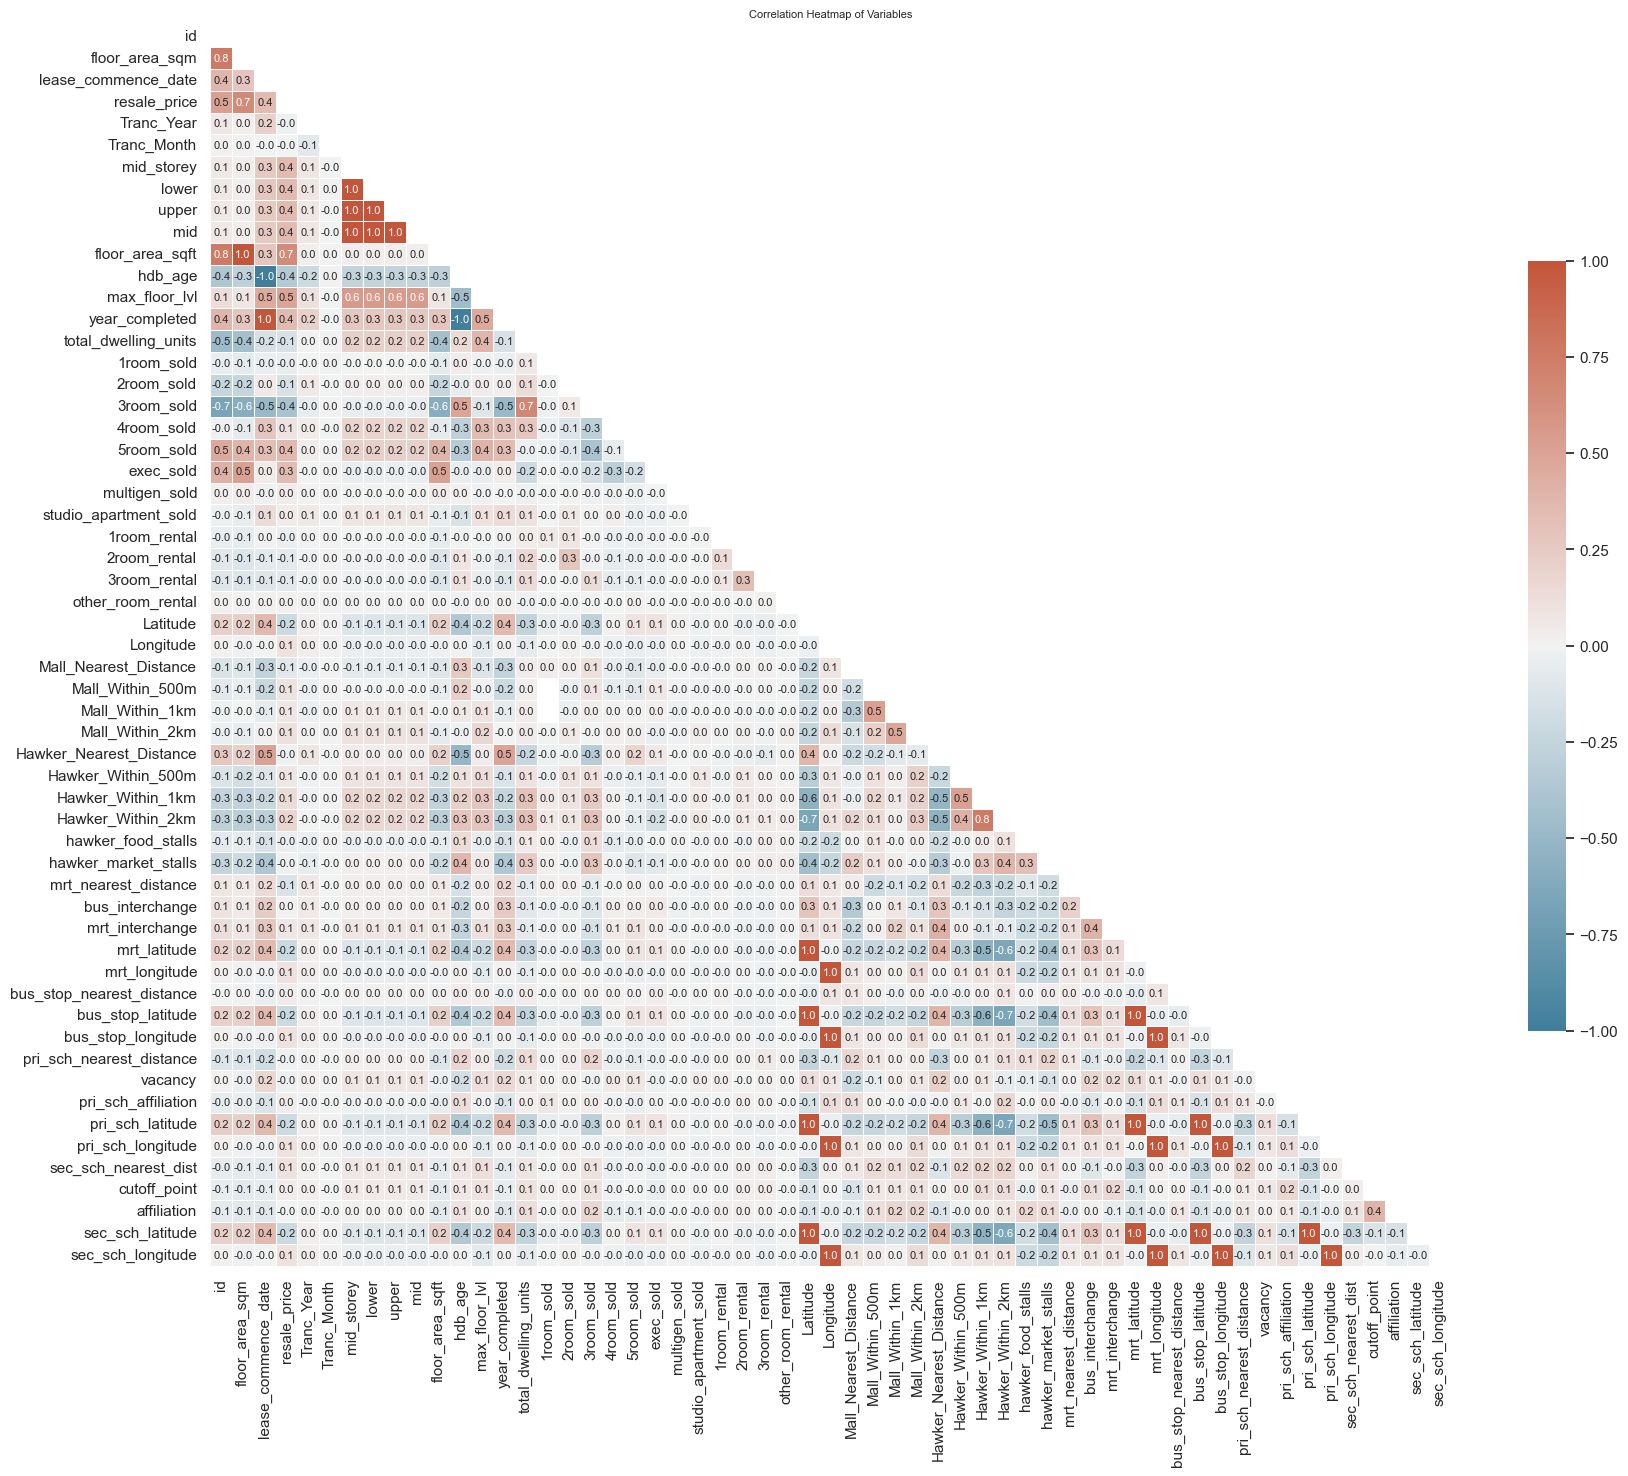

In [9]:
# Correlation of all numerical variables to observe the relationships between them 
# and see if there is multicollinearity between any 2 variables

sns.set_theme(style="white")
corr = housing_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0, fmt = '.1f',
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size":8})
plt.title('Correlation Heatmap of Variables', fontsize=8)

In [10]:
# Looking at how the variables correlate with resale price

round(housing[housing.columns[1:]].corr()['resale_price'][:],2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_7907/3809399179.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  round(housing[housing.columns[1:]].corr()['resale_price'][:],2)


floor_area_sqm               0.65
lease_commence_date          0.35
resale_price                 1.00
Tranc_Year                  -0.02
Tranc_Month                 -0.01
mid_storey                   0.35
lower                        0.35
upper                        0.35
mid                          0.35
floor_area_sqft              0.65
hdb_age                     -0.35
max_floor_lvl                0.50
year_completed               0.35
total_dwelling_units        -0.14
1room_sold                  -0.04
2room_sold                  -0.15
3room_sold                  -0.41
4room_sold                   0.09
5room_sold                   0.36
exec_sold                    0.34
multigen_sold                0.04
studio_apartment_sold        0.04
1room_rental                -0.04
2room_rental                -0.08
3room_rental                -0.08
other_room_rental            0.01
Latitude                    -0.22
Longitude                    0.11
Mall_Nearest_Distance       -0.09
Mall_Within_50

### Examining the dependent variable

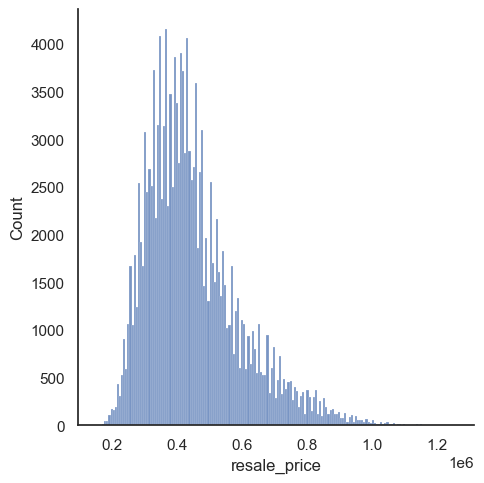

In [11]:
sns.displot(data=housing, x="resale_price")

<AxesSubplot: xlabel='resale_price'>

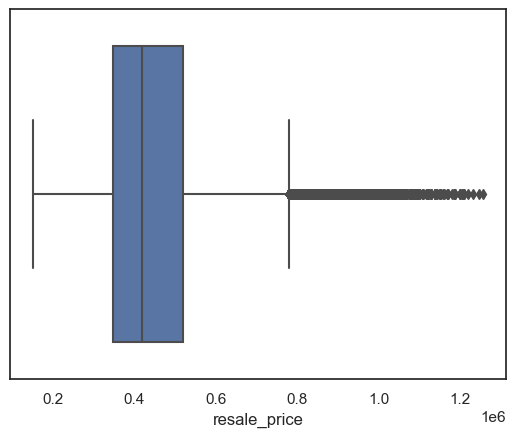

In [12]:
sns.boxplot(data=housing, x="resale_price")

In [13]:
# Removing outliers in the dependent variable and analysing them separately

Q1 = np.percentile(housing['resale_price'] , 25)
Q3 = np.percentile(housing['resale_price'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
outliers = housing['resale_price'][(housing['resale_price'] > ul)]
outliers_df = housing.iloc[outliers.index]
housing.drop(outliers.index, inplace = True)


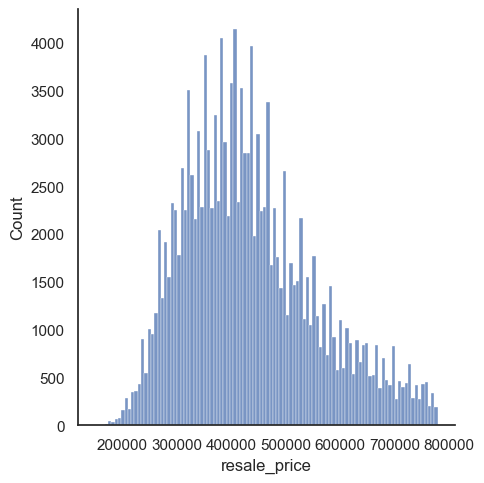

In [14]:
# Looking once again at the distribution of resale price

sns.displot(data=housing, x="resale_price")

It resembles a normal curve alot more now, which fulfills an assumption for linear regression.

### Checking for Missing Data and handling them

In [15]:
# Checking for columns with null data.

housing.isna().sum()

Tranc_YearMonth                  0
town                             0
flat_type                        0
block                            0
street_name                      0
storey_range                     0
floor_area_sqm                   0
flat_model                       0
lease_commence_date              0
resale_price                     0
Tranc_Year                       0
Tranc_Month                      0
mid_storey                       0
lower                            0
upper                            0
mid                              0
full_flat_type                   0
address                          0
floor_area_sqft                  0
hdb_age                          0
max_floor_lvl                    0
year_completed                   0
residential                      0
commercial                       0
market_hawker                    0
multistorey_carpark              0
precinct_pavilion                0
total_dwelling_units             0
1room_sold          

<AxesSubplot: >

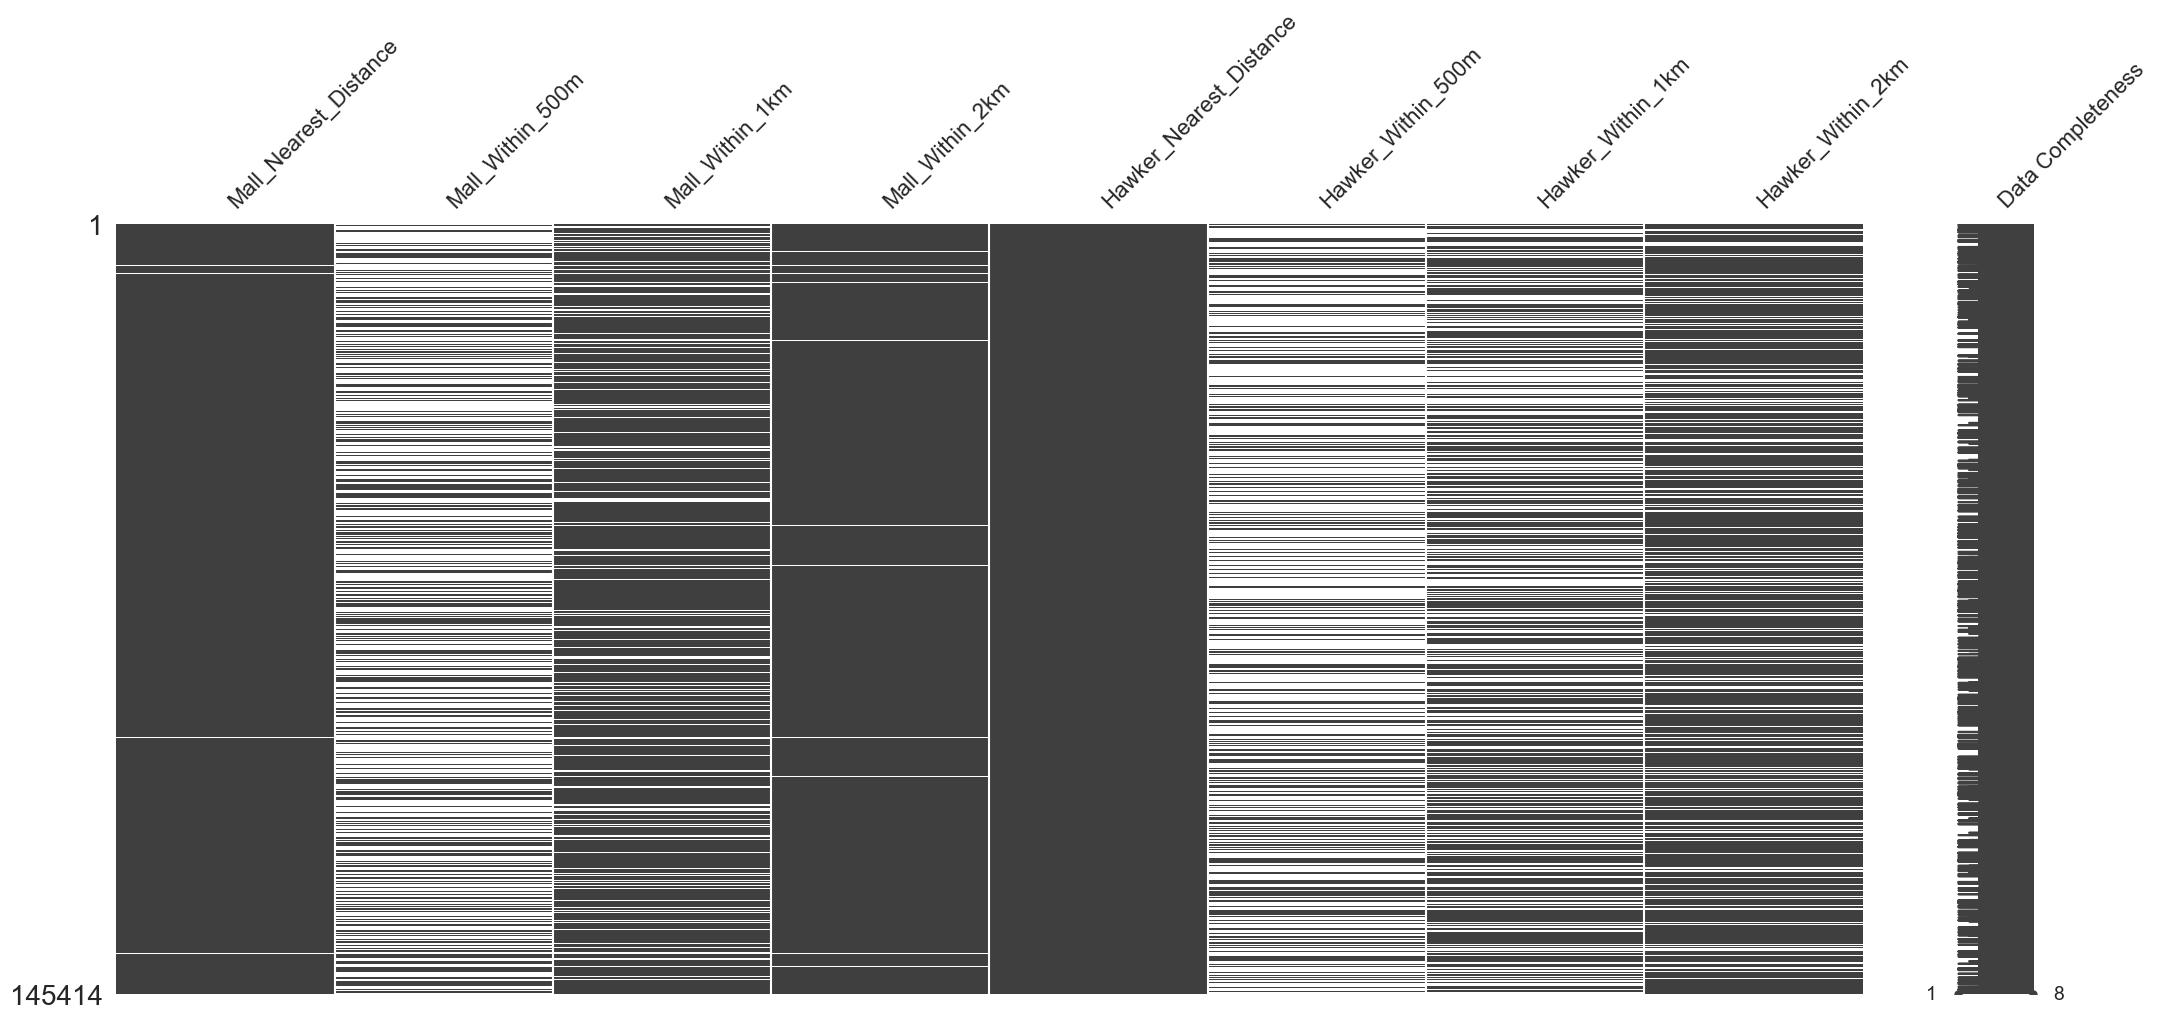

In [16]:
# Visualising missing data in columns with missing data

to_check = housing[['Mall_Nearest_Distance', 'Mall_Within_500m', 'Mall_Within_1km',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_500m',
       'Hawker_Within_1km', 'Hawker_Within_2km']]

msno.matrix(to_check, labels = True)

There are rows with supposedly 0 mall nearest distance but counts for malls within 500m,# 1km etc. We will drop these rows as the missing values are likely to be due to errors during data collection, since there should be data in the nearest distance column

In [17]:
# Dropping rows

no_mall_distance = housing[(housing['Mall_Nearest_Distance'].isnull()) & 
                           (housing['Mall_Within_500m'].isnull())]
to_drop = no_mall_distance.index
housing.drop(to_drop, inplace = True)

In [18]:
# Should the missing values under the columns on malls within a certain radius have values?

housing[housing['Mall_Within_500m'].isnull() & (housing['Mall_Nearest_Distance'] <= 500)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [19]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_1km'].isnull() & (housing['Mall_Nearest_Distance'] <= 1000)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [20]:
# Should the missing values under the columns on malls within a certain radius have values?
housing[housing['Mall_Within_2km'].isnull() & (housing['Mall_Nearest_Distance'] <= 2000)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [21]:
# Remaining NaN values can be replaced by 0 as the figures correspond with the nearest distance

housing['Mall_Within_500m'].fillna(0, inplace = True)
housing['Mall_Within_1km'].fillna(0, inplace = True)
housing['Mall_Within_2km'].fillna(0, inplace = True)

In [22]:
# Looking at the missing values for hawker distances, seems to be similar to mall distances:

housing[housing['Hawker_Within_500m'].isnull()]

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
1,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,NaN,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
3,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,NaN,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,NaN,NaN,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
6,2018-05,HOUGANG,5 ROOM,641,HOUGANG AVE 8,07 TO 09,120.0,Improved,1987,433000.0,2018,5,8,7,9,8,5 ROOM Improved,"641, HOUGANG AVE 8",1291.680,34,17,1986,Y,N,N,N,N,64,0,0,0,0,64,0,0,0,0,0,0,0,530641,1.371276,103.880059,Hougang,490.262931,1.0,1.0,8.0,516.981824,NaN,1.0,4.0,40,0,1370.648274,Kovan,0,0,1.359703,103.884303,46.567429,Blk 639,1.370877,103.880187,331.669318,Xinmin Primary School,48,0,1.371415,103.883039,294.826501,Bowen Secondary School,224,0,1.370751,103.877459
7,2012-03,BEDOK,3 ROOM,701,BEDOK RESERVOIR RD,06 TO 10,68.0,New Generation,1980,340000.0,2012,3,8,6,10,8,3 ROOM New Generation,"701, BEDOK RESERVOIR RD",731.952,41,12,1980,Y,Y,N,N,N,132,0,0,110,22,0,0,0,0,0,0,0,0,470701,1.337642,103.918906,Bedok,1749.147519,0.0,0.0,3.0,734.252454,NaN,2.0,5.0,36,75,291.626388,Bedok North,0,0,1.335166,103.918039,71.972918,Opp Blk 701,1.338071,103.919390,365.790881,Damai Primary School,56,0,1.335351,103.921268,835.014747,Damai Secondary School,188,0,1.337545,103.926417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150628,2020-07,SENGKANG,5 ROOM,469C,SENGKANG WEST WAY,10 TO 12,113.0,Improved,2016,555000.0,2020,7,11,10,12,11,5 ROOM Improved,"469C, SENG

In [23]:
# Should the missing values under the columns on hawker within a certain radius have values?
housing[housing['Hawker_Within_500m'].isnull() & (housing['Hawker_Nearest_Distance'] <= 500)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [24]:
housing[housing['Hawker_Within_1km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 1000)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [25]:
housing[housing['Hawker_Within_2km'].isnull() & (housing['Hawker_Nearest_Distance'] <= 2000)]


,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude


In [26]:
# Same as the mall variables, so we will replace NaN with 0

housing['Hawker_Within_500m'].fillna(0, inplace = True)
housing['Hawker_Within_1km'].fillna(0, inplace = True)
housing['Hawker_Within_2km'].fillna(0, inplace = True)

In [27]:
housing.head()

,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,Tranc_Year,Tranc_Month,mid_storey,lower,upper,mid,full_flat_type,address,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,Latitude,Longitude,planning_area,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,680000.0,2016,5,11,10,12,11,4 ROOM Model A,"3B, UPP BOON KENG RD",968.760,15,25,2005,Y,N,N,N,N,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,665000.0,2012,7,8,7,9,8,5 ROOM Improved,"153, BISHAN ST 13",1399.320,34,9,1987,Y,N,N,N,N,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
3,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,550000.0,2012,4,3,1,5,3,4 ROOM Model A,"232, BISHAN ST 22",1108.692,29,11,1990,Y,Y,N,N,N,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,298000.0,2017,12,2,1,3,2,4 ROOM Simplified,"876, YISHUN ST 81",893.412,34,4,1987,Y,N,N,N,N,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
5,2013-01,GEYLANG,3 ROOM,95,ALJUNIED CRES,07 TO 09,65.0,Improved,1975,335000.0,2013,1,8,7,9,8,3 ROOM Improved,"95, ALJUNIED CRES",699.660,46,12,1974,Y,Y,N,N,N,193,0,0,188,0,5,0,0,0,0,0,0,0,380095,1.321703,103.886196,Geylang,684.004001,0.0,3.0,6.0,148.418247,2.0,5.0,11.0,79,82,678.291272,MacPherson,0,1,1.325859,103.890663,229.680469,Blk 90,1.323622,103.886962,594.128568,Saint Margaret's Primary School,65,1,1.324470,103.881623,608.838174,Geylang Methodist School,224,0,1.317659,103.882504


### Cleaning and EDA of numerical variables

#### Longitude and latitude

Based on external research, the factors affecting property resale price include distance from workplaces, the majority of which are located in the CBD district. We can try getting the approximate straight-line distance between each unit and the CBD. 

In [28]:
# Taking Tanjong Pagar as proxy for CBD

housing['CBD_latitude'] = [1.275619 for x in housing['Latitude']]
housing['CBD_longitude'] = [103.842431 for x in housing['Longitude']]

In [29]:
# Formula for straight line distance based on latitude and longitude

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [30]:
# Creating a new column for distance from CBD

housing['distance_from_CBD'] = haversine_np(housing['Latitude'],housing['Longitude'],housing['CBD_latitude'],housing['CBD_longitude'])

We can use the distance variables to account for distance from these amenities from the unit instead of relying on the raw latitude/longitude. We will drop the variables for postal code, latitude and longitude since there are other existing variables that can be substituted instead and have higher interpretability in a regression model. 


In [31]:
# Dropping all latitude, longitude and postal code

housing.drop(columns = ['Latitude', 'Longitude','mrt_latitude', 'mrt_longitude',
                        'bus_stop_latitude','bus_stop_longitude','pri_sch_latitude','pri_sch_longitude',
                        'sec_sch_longitude','sec_sch_latitude','postal','CBD_latitude','CBD_longitude'], inplace = True)

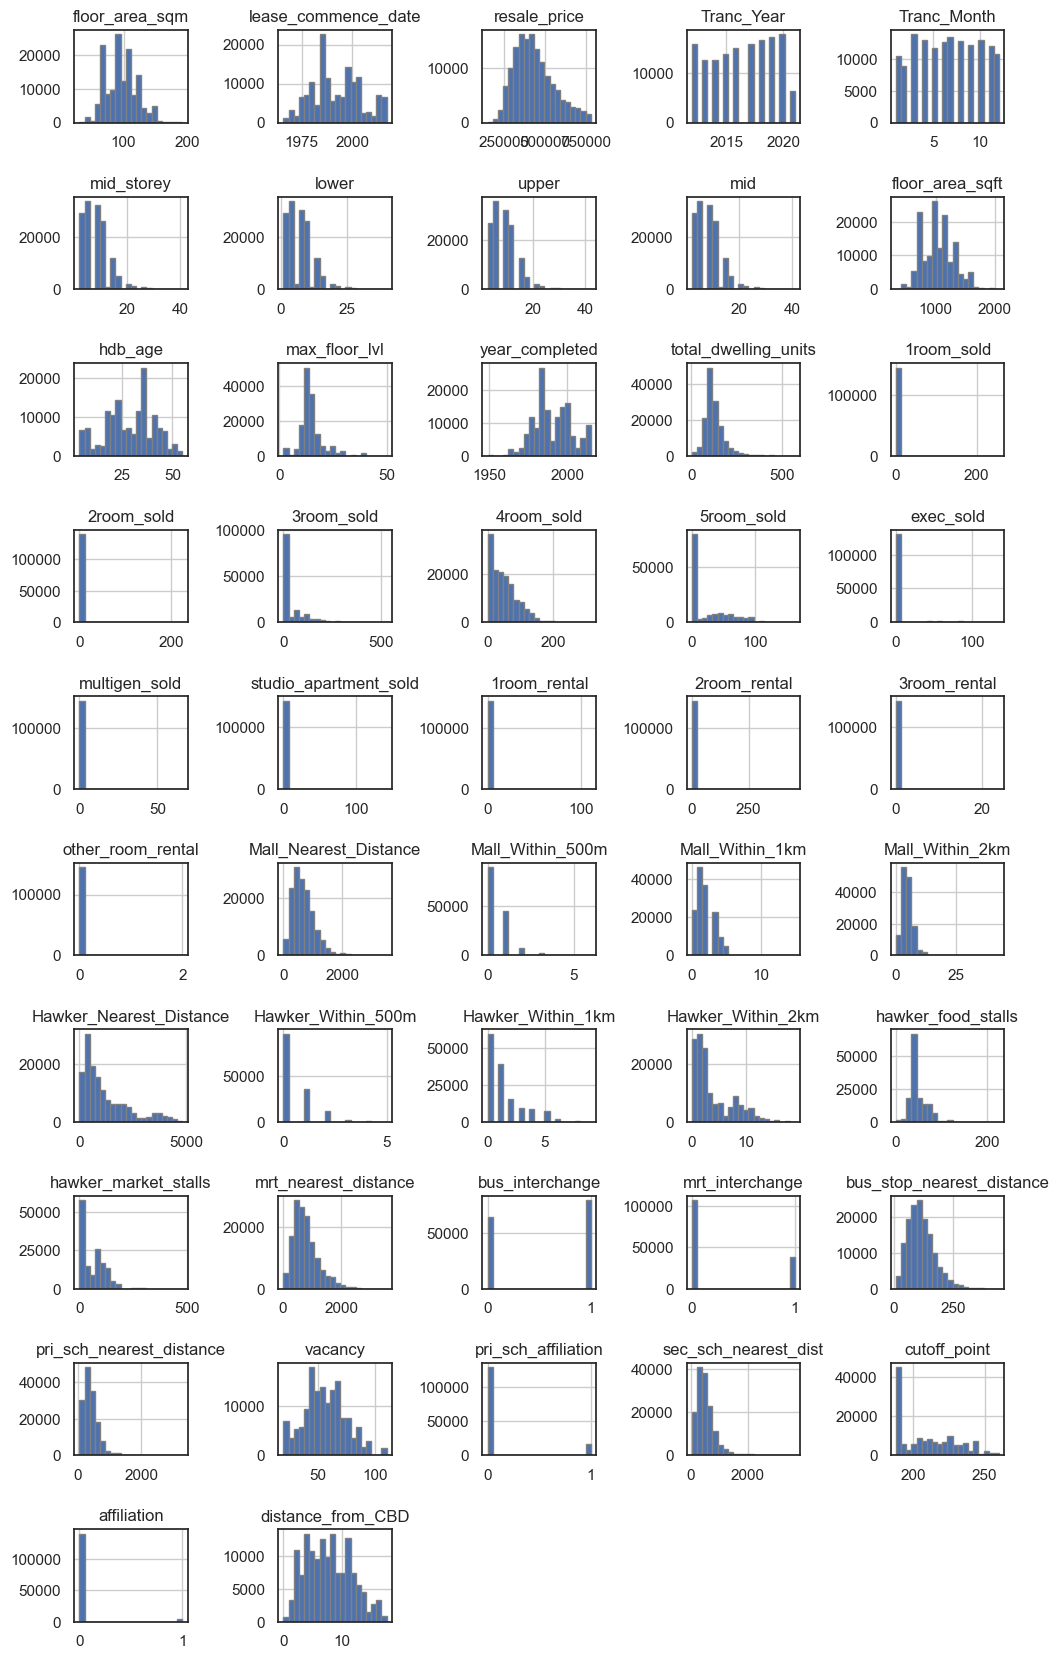

In [32]:
# Examining distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


Several variables have a high number of zeros, indicating potentially sparse distributions that may be difficult to approximate to a normal distribution required for linear regression models. Some of the variables above should also be of a different type: bus and mrt interchange might be better as categorical variables.

In [33]:
# Changing type of mrt and bus interchange to categorical since they're essentially boolean

housing['bus_interchange'] = housing['bus_interchange'].astype('object')
housing['mrt_interchange'] = housing['mrt_interchange'].astype('object')

In [34]:
# Checking variables for potential sparsity by seeing which columns have the high percentage of 0s

print('cols')
col_sparsity = housing[housing == 0].count(axis=0)/len(housing.index)
print(col_sparsity[col_sparsity >0.5])

cols
1room_sold               0.999433
2room_sold               0.958614
3room_sold               0.629549
exec_sold                0.829425
multigen_sold            0.999627
studio_apartment_sold    0.991911
1room_rental             0.997919
2room_rental             0.987120
3room_rental             0.973659
other_room_rental        0.999848
Mall_Within_500m         0.614457
Hawker_Within_500m       0.656319
mrt_interchange          0.737604
pri_sch_affiliation      0.889325
affiliation              0.969289
dtype: float64


### Dropping variables due to data sparsity

In [35]:
# dropping columns due to sparsity of data (more than 80% missing)

housing.drop(columns = ['Mall_Within_500m', 'Hawker_Within_500m', 'mrt_interchange',
                        'affiliation', 'pri_sch_affiliation', '1room_rental','2room_rental', 
                        '3room_rental', 'other_room_rental'], inplace = True)

### Examining variables relating to rooms sold

In [36]:
# Checking for correlation 

housing.loc[:,['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units','resale_price']].corr()

,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,total_dwelling_units,resale_price
1room_sold,1.000000,-0.003643,-0.013117,-0.026597,-0.018621,-0.007237,-0.000418,-0.001866,0.057314,-0.044617
2room_sold,-0.003643,1.000000,0.049778,-0.128655,-0.117290,-0.046436,-0.002686,0.050568,0.149113,-0.161687
3room_sold,-0.013117,0.049778,1.000000,-0.304522,-0.407561,-0.160814,-0.008520,0.004593,0.705114,-0.443909
4room_sold,-0.026597,-0.128655,-0.304522,1.000000,-0.079780,-0.288754,-0.017010,0.015212,0.222417,0.072306
5room_sold,-0.018621,-0.117290,-0.407561,-0.079780,1.000000,-0.146233,-0.013730,-0.037742,-0.081843,0.331164
exec_sold,-0.007237,-0.046436,-0.160814,-0.288754,-0.146233,1.000000,-0.005336,-0.023809,-0.194679,0.366070
multigen_sold,-0.000418,-0.002686,-0.008520,-0.017010,-0.013730,-0.005336,1.000000,-0.001376,-0.017488,0.028975
studio_apartment_sold,-0.001866,0.050568,0.004593,0.015212,-0.037742,-0.023809,-0.001376,1.000000,0.087471,0.033644
total_dwelling_units,0.057314,0.149113,0.705114,0.222417,-0.081843,-0.194679,-0.017488,0.087471,1.000000,-0.233104
resale_price,-0.044617,-0.161687,-0.443909,0.072306,0.331164,0.366070,0.028975,0.033644,-0.233104,1.000000


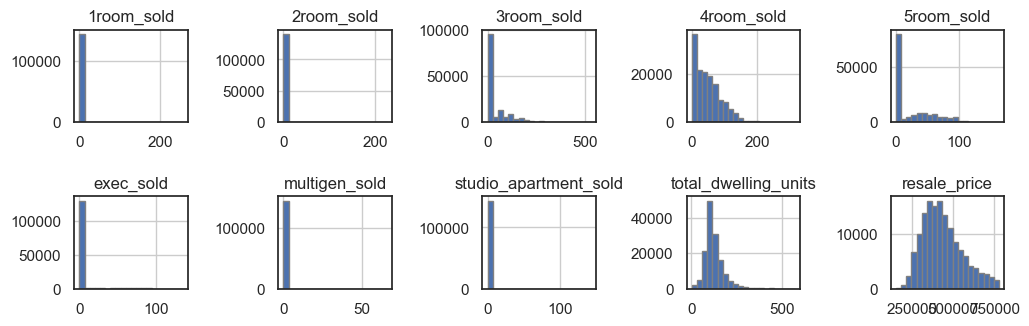

In [37]:
# Examining distributions of variables relating to rooms sold

housing_num = housing[['1room_sold', '2room_sold','3room_sold',
               '4room_sold', '5room_sold', 'exec_sold',
               'multigen_sold','studio_apartment_sold',
               'total_dwelling_units','resale_price']]
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


Most of the variables for number of rooms sold are very sparse, with a high number of 0s, other than 4-room and 5-room units. We will try combining some of these variables and look at their relationship with resale price. 

In [38]:
housing['1_2_3_rooms_sold'] = housing['1room_sold'] + housing['2room_sold'] + housing['3room_sold']
housing['4_5_other_rooms_sold'] = housing['4room_sold'] + housing['5room_sold'] + housing['exec_sold'] + housing['multigen_sold'] + housing['studio_apartment_sold']

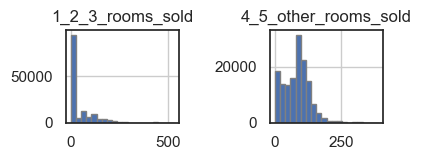

In [39]:
# Examining distributions of variables relating to rooms sold

housing_num = housing[['1_2_3_rooms_sold', '4_5_other_rooms_sold']]

housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [40]:
# We will drop these columns from analysis since they've been transformed
# Also dropping total dwelling units since they're highly correlated

housing.drop(columns = ['1room_sold', '2room_sold','3room_sold', '4room_sold', '5room_sold', 'exec_sold', 
                        'multigen_sold','studio_apartment_sold','total_dwelling_units'], inplace = True)

### Examining variables relating to distance from malls

In [41]:
# Looking at Mall distance variables

housing[['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km']].head()

,Mall_Nearest_Distance,Mall_Within_1km,Mall_Within_2km
0,1094.090418,0.0,7.0
1,866.941448,1.0,3.0
3,950.175199,1.0,4.0
4,729.771895,1.0,2.0
5,684.004001,3.0,6.0


In [42]:
# Checking for correlation between mall distance features

housing.loc[:,['Mall_Nearest_Distance', 'Mall_Within_1km','Mall_Within_2km', 'resale_price']].corr()

,Mall_Nearest_Distance,Mall_Within_1km,Mall_Within_2km,resale_price
Mall_Nearest_Distance,1.000000,-0.582009,-0.183992,-0.099720
Mall_Within_1km,-0.582009,1.000000,0.445940,0.095109
Mall_Within_2km,-0.183992,0.445940,1.000000,0.092768
resale_price,-0.099720,0.095109,0.092768,1.000000


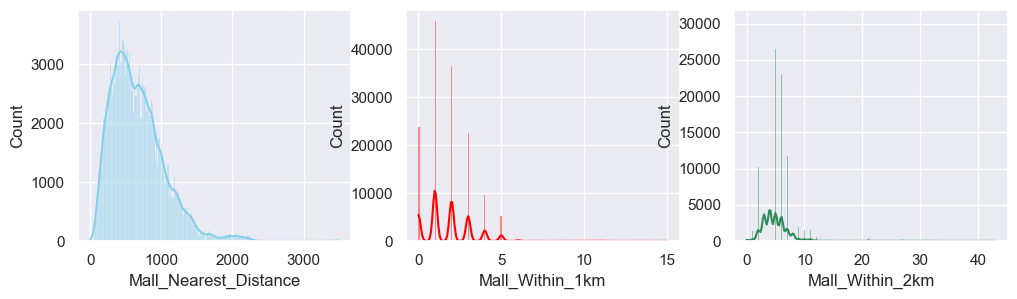

In [43]:
# Looking at the mall distance variables' distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Mall_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Mall_Within_1km", kde=True, color="red", ax=axs[1])
sns.histplot(data=df, x="Mall_Within_2km", kde=True, color="seagreen", ax=axs[2])

plt.show()

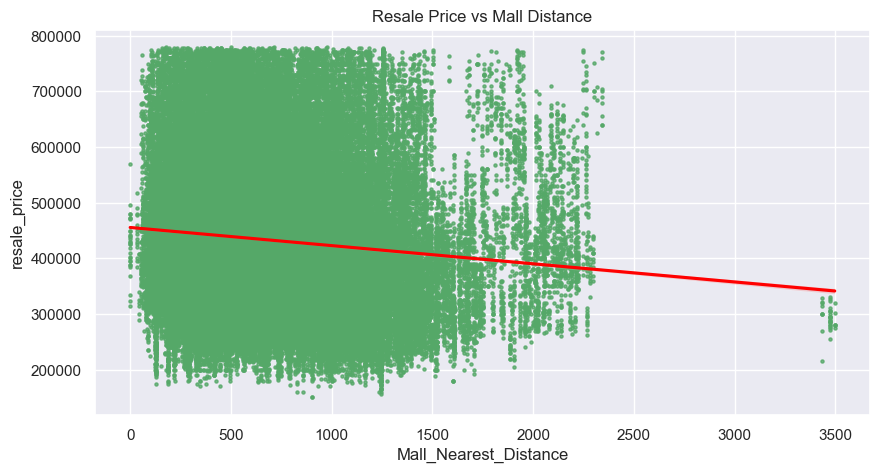

In [44]:
# Relationship between resale price and unit's distance from a mall

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Mall_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Mall Distance');

Distance from a mall seems inversely correlated with resale price, so we will keep this variable.
Since 'Mall_Within_500m' and  'Mall_Within_1km' are both highly correlated with 'Mall_Within_2km', and the last one is best correlated with the dependent variable, we will drop the first 2 and just use Mall within 2km to see if the number of malls within a 2km radius impacts resale price.

In [45]:
housing.drop(columns = 'Mall_Within_1km', inplace = True)

### Examining variables relating to distance from hawkers¶

In [46]:
# Checking for correlation between hawker distance features

housing.loc[:,['Hawker_Nearest_Distance', 'Hawker_Within_1km', 'Hawker_Within_2km', 'resale_price']].corr()

,Hawker_Nearest_Distance,Hawker_Within_1km,Hawker_Within_2km,resale_price
Hawker_Nearest_Distance,1.000000,-0.605262,-0.596564,0.060545
Hawker_Within_1km,-0.605262,1.000000,0.832002,-0.017284
Hawker_Within_2km,-0.596564,0.832002,1.000000,0.058354
resale_price,0.060545,-0.017284,0.058354,1.000000


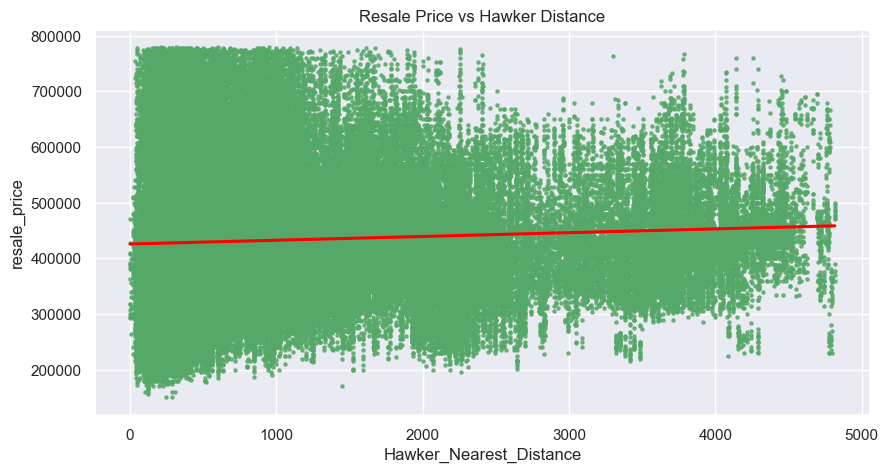

In [47]:
# Examining relationship between resale price and unit's distance from hawkers

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="Hawker_Nearest_Distance", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Hawker Distance');

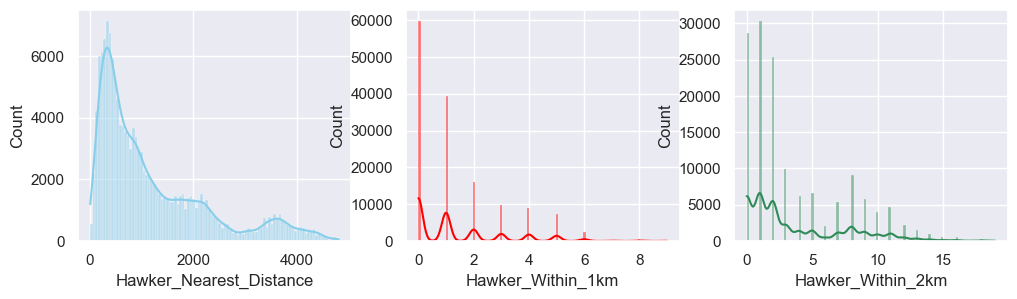

In [48]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
df = housing
 
sns.histplot(data=df, x="Hawker_Nearest_Distance", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Hawker_Within_1km", kde=True, color="red", ax=axs[1])
sns.histplot(data=df, x="Hawker_Within_2km", kde=True, color="seagreen", ax=axs[2])

plt.show()

In [49]:
# Will do the same for hawkers 

housing.drop(columns = 'Hawker_Within_1km', inplace = True)

### Examining variables relating to unit size and amenities

In [50]:
# Looking at variables relating to unit size and profile

housing[['storey_range','floor_area_sqm', 'lease_commence_date', 'mid_storey', 
         'lower', 'upper', 'mid','floor_area_sqft', 'hdb_age','max_floor_lvl', 
         'year_completed', 'commercial', 'market_hawker','multistorey_carpark',
         'precinct_pavilion', 'Tranc_YearMonth', 'Tranc_Year', 'Tranc_Month']].head()

,storey_range,floor_area_sqm,lease_commence_date,mid_storey,lower,upper,mid,floor_area_sqft,hdb_age,max_floor_lvl,year_completed,commercial,market_hawker,multistorey_carpark,precinct_pavilion,Tranc_YearMonth,Tranc_Year,Tranc_Month
0,10 TO 12,90.0,2006,11,10,12,11,968.760,15,25,2005,N,N,N,N,2016-05,2016,5
1,07 TO 09,130.0,1987,8,7,9,8,1399.320,34,9,1987,N,N,N,N,2012-07,2012,7
3,01 TO 05,103.0,1992,3,1,5,3,1108.692,29,11,1990,Y,N,N,N,2012-04,2012,4
4,01 TO 03,83.0,1987,2,1,3,2,893.412,34,4,1987,N,N,N,N,2017-12,2017,12
5,07 TO 09,65.0,1975,8,7,9,8,699.660,46,12,1974,Y,N,N,N,2013-01,2013,1


In [51]:
# replace all storey-related variables with mid-storey as the estimated median height  

housing['est_floor_level'] = housing['mid_storey'] 
housing.drop(columns = ['storey_range', 'lower','upper', 'mid','mid_storey','max_floor_lvl'], inplace = True)

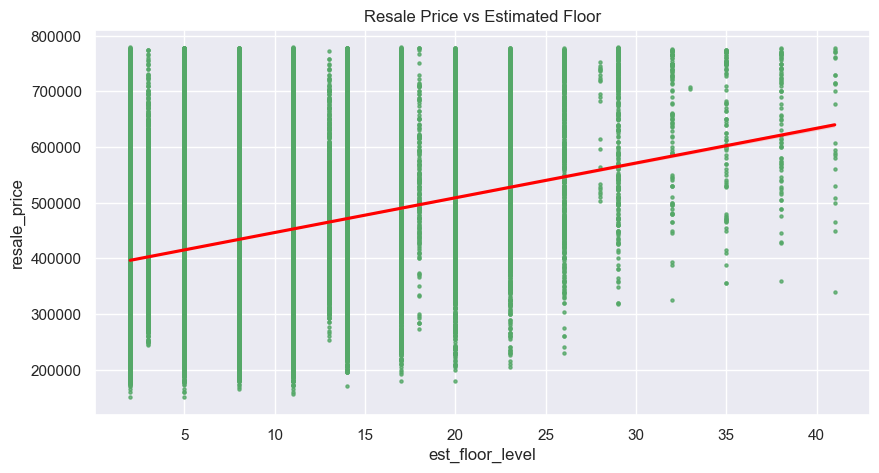

In [52]:
# Examining relationship between resale price and unit's estimated floor level

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="est_floor_level", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Estimated Floor');

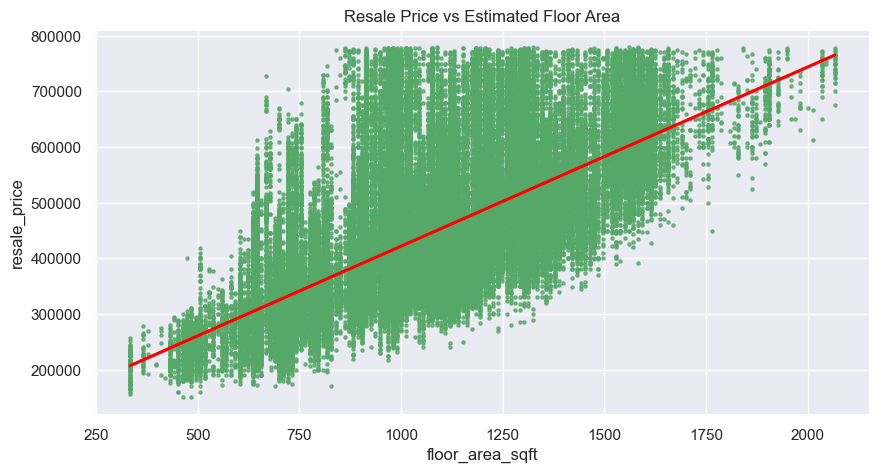

In [53]:
# Examining relationship between resale price and unit's floor area

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="floor_area_sqft", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Estimated Floor Area');

In [54]:
# To use floor_area_sqft instead of floor_area_sqm for size of flat since they're substitutes

housing.drop(columns = 'floor_area_sqm', inplace = True)

In [55]:
# Creating a new variable to estimate the unit's age at the point of transaction 
# Existing time-related variables are less relevant because they look at absolute age of the unit
# Dropping the other variables 

housing['age_at_sale'] = housing['Tranc_Year'] - housing['lease_commence_date']

housing.drop(columns = 
             ['hdb_age','year_completed','Tranc_YearMonth','lease_commence_date'], 
             inplace = True)

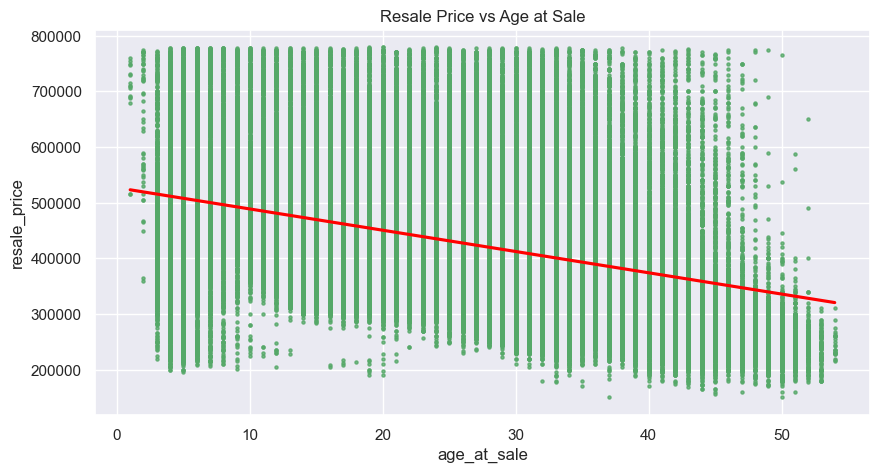

In [56]:
# Examining relationship between resale price and unit's floor area

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="age_at_sale", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Age at Sale');

Clear downward trend on resale price with each unit increase in age at the point of transaction.

### Examining variables relating to schools

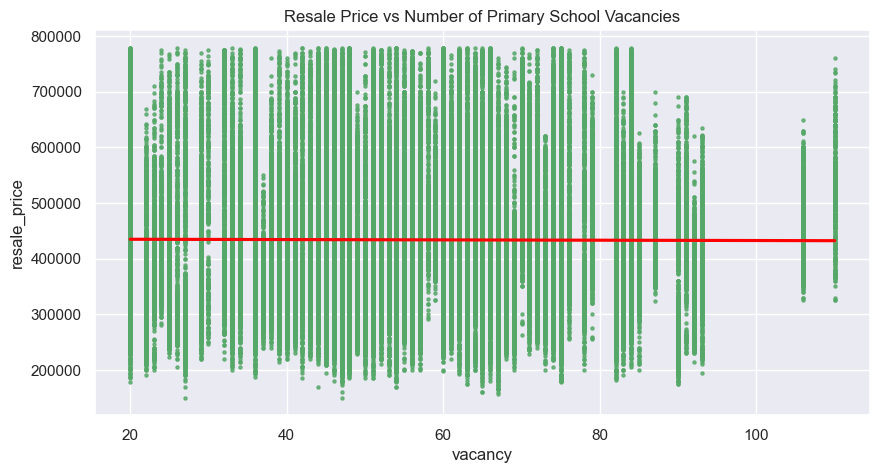

In [57]:
# Examining relationship between resale price and number of pri sch vacancies

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="vacancy", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Number of Primary School Vacancies');

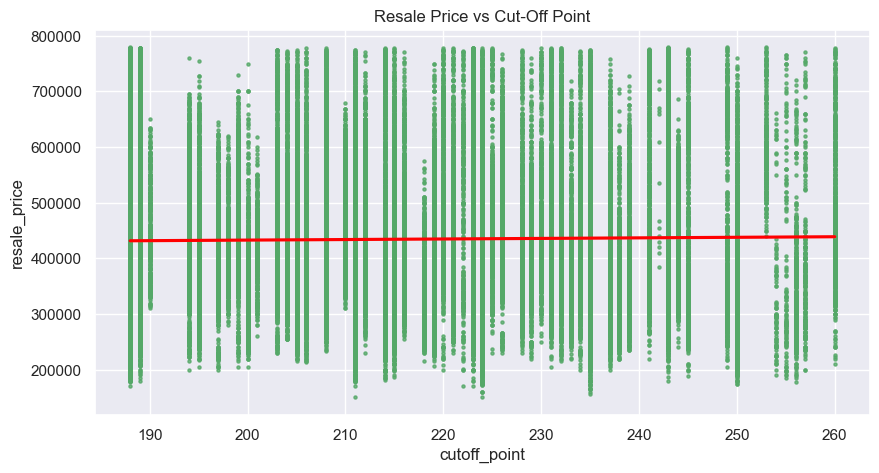

In [58]:
# Examining relationship between resale price and cut-off point

fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="cutoff_point", y="resale_price", data=housing,
           scatter_kws={"color": "g", 's':5}, line_kws={"color": "red"})
ax.set_title('Resale Price vs Cut-Off Point');

In [59]:
# To drop both variables given that resale price seems unaffected by either

housing.drop(columns = ['cutoff_point', 'vacancy'], inplace = True)

### Normalising the distributions of remaining variables

We'll be converting the following variables to categorical since we're interested to see which year or month might have higher/lower resale prices not looking at longitudinal trends over time, whereby we would convert to datetime type instead.

In [60]:
# Converting transaction year and month to categorical variables

housing['Tranc_Year'] = housing['Tranc_Year'].astype('object')
housing['Tranc_Month'] = housing['Tranc_Month'].astype('object')

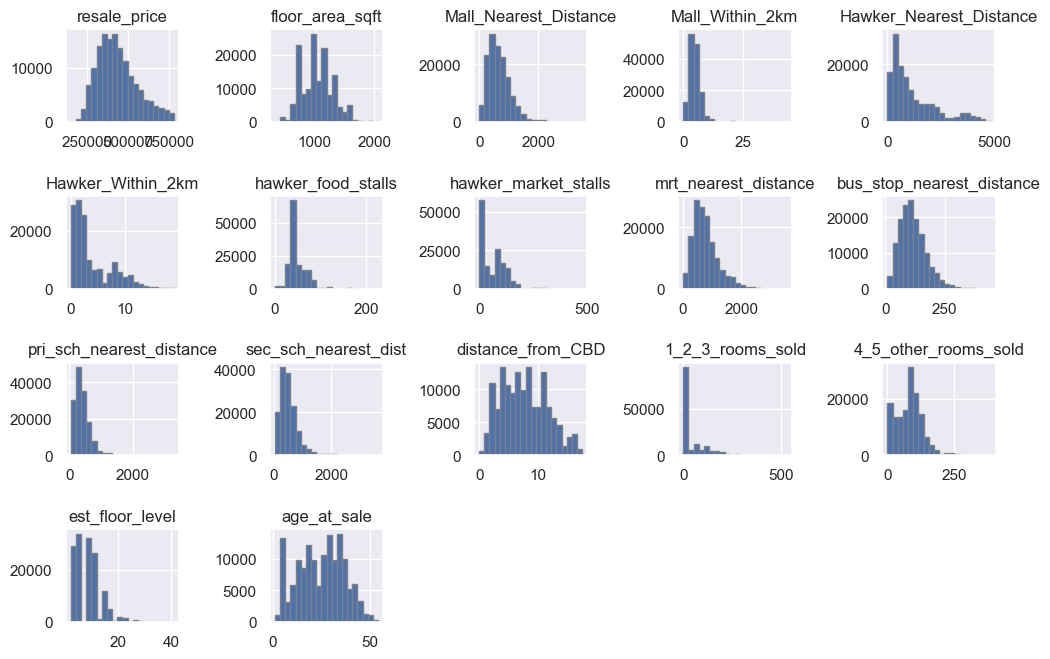

In [61]:
# Re-examining the distributions of remaining numerical variables

housing_num = housing.select_dtypes("number")
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [62]:
# To log all variables with large scales, but first replace 0 with 0.01 since log(0) is undefined. 

housing_num["Mall_Nearest_Distance"].replace({0:0.01}, inplace = True)
housing_num["Mall_Within_2km"].replace({0:0.01}, inplace = True)
housing_num["Hawker_Within_2km"].replace({0:0.01}, inplace = True)
housing_num["hawker_food_stalls"].replace({0:0.01}, inplace = True)
housing_num["hawker_market_stalls"].replace({0:0.01}, inplace = True)
housing_num["1_2_3_rooms_sold"].replace({0:0.01}, inplace = True)
housing_num["4_5_other_rooms_sold"].replace({0:0.01}, inplace = True)

In [63]:
housing_num.describe()

,resale_price,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
count,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000
mean,433821.778590,1037.335164,664.713317,5.151107,1191.815997,3.616095,48.699190,57.337986,771.525902,114.960831,393.332881,502.924012,7.686708,42.320819,80.760146,7.982598,24.376839
std,121070.637266,259.282919,369.901368,3.389577,1079.765827,3.870149,18.850404,55.586267,429.477892,55.346390,233.696059,305.783699,3.847360,71.400942,49.860553,4.993436,11.765410
min,150000.000000,333.684000,0.010000,0.010000,1.873295,0.010000,0.010000,0.010000,21.971410,9.001285,45.668324,38.913475,0.000034,0.010000,0.010000,2.000000,1.000000
25%,345000.000000,796.536000,391.473823,3.000000,380.723496,1.000000,40.000000,0.010000,464.315367,74.954844,226.285769,287.772568,4.459915,0.010000,44.000000,5.000000,15.000000
50%,417000.000000,1011.816000,604.626276,5.000000,804.097730,2.000000,43.000000,48.000000,691.709522,107.567296,347.071687,444.522859,7.339906,0.010000,86.000000,8.000000,25.000000
75%,505000.000000,1194.804000,868.818135,6.000000,1718.581240,6.000000,60.000000,99.000000,983.808309,146.255568,500.349038,637.187668,10.686297,66.000000,110.000000,11.000000,33.000000
max,779000.000000,2066.688000,3496.402910,43.000000,4816.062542,19.000000,226.000000,477.000000,3544.504228,443.964584,3305.841039,3638.977233,17.555045,528.000000,388.000000,41.000000,54.000000


In [64]:
# Applying log-scaling to numerical variables

housing_num.drop(columns = 'resale_price', inplace = True)
housing[housing_num.columns] = np.log(housing_num)

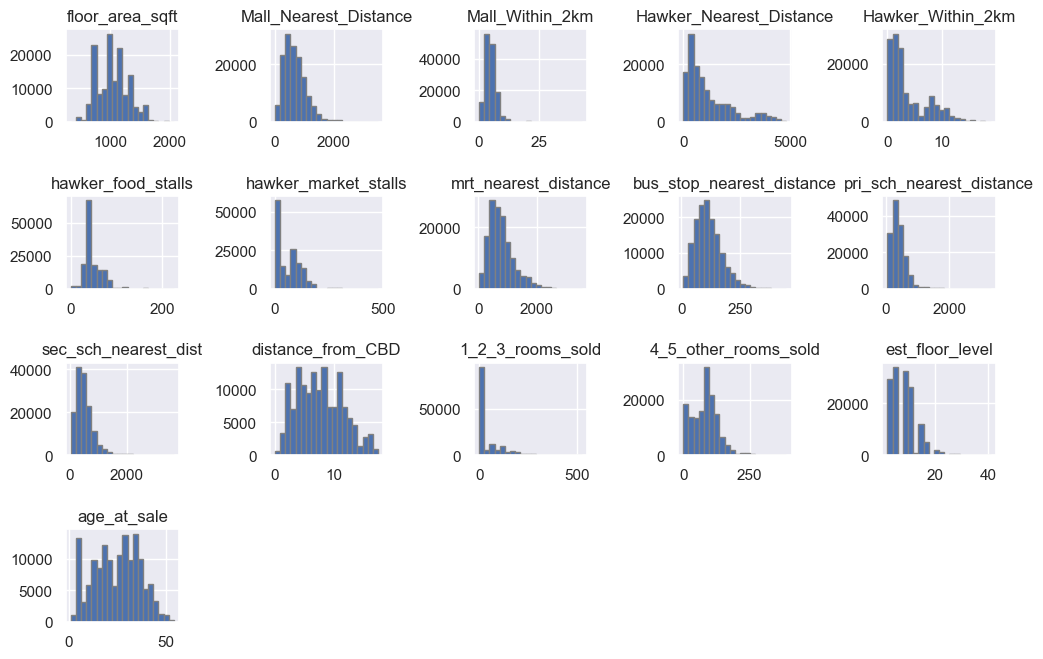

In [65]:
housing_num.hist(bins=20, figsize=(12, 25), edgecolor="gray", layout=(12, 5))
plt.subplots_adjust(hspace=0.8, wspace=0.8)


In [66]:
housing_num.describe()

,floor_area_sqft,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
count,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000
mean,1037.335164,664.713317,5.151107,1191.815997,3.616095,48.699190,57.337986,771.525902,114.960831,393.332881,502.924012,7.686708,42.320819,80.760146,7.982598,24.376839
std,259.282919,369.901368,3.389577,1079.765827,3.870149,18.850404,55.586267,429.477892,55.346390,233.696059,305.783699,3.847360,71.400942,49.860553,4.993436,11.765410
min,333.684000,0.010000,0.010000,1.873295,0.010000,0.010000,0.010000,21.971410,9.001285,45.668324,38.913475,0.000034,0.010000,0.010000,2.000000,1.000000
25%,796.536000,391.473823,3.000000,380.723496,1.000000,40.000000,0.010000,464.315367,74.954844,226.285769,287.772568,4.459915,0.010000,44.000000,5.000000,15.000000
50%,1011.816000,604.626276,5.000000,804.097730,2.000000,43.000000,48.000000,691.709522,107.567296,347.071687,444.522859,7.339906,0.010000,86.000000,8.000000,25.000000
75%,1194.804000,868.818135,6.000000,1718.581240,6.000000,60.000000,99.000000,983.808309,146.255568,500.349038,637.187668,10.686297,66.000000,110.000000,11.000000,33.000000
max,2066.688000,3496.402910,43.000000,4816.062542,19.000000,226.000000,477.000000,3544.504228,443.964584,3305.841039,3638.977233,17.555045,528.000000,388.000000,41.000000,54.000000


### Looking at Categorical variables

#### a) Flat Types

In [67]:
# Looking at flat type columns, which seem similar...

housing[['flat_model', 'full_flat_type', 'flat_type']].head()

,flat_model,full_flat_type,flat_type
0,Model A,4 ROOM Model A,4 ROOM
1,Improved,5 ROOM Improved,5 ROOM
3,Model A,4 ROOM Model A,4 ROOM
4,Simplified,4 ROOM Simplified,4 ROOM
5,Improved,3 ROOM Improved,3 ROOM


In [68]:
housing.groupby('flat_model')['resale_price'].median().sort_values(ascending = False)

flat_model
Premium Apartment Loft    741400.0
Terrace                   730000.0
Multi Generation          725000.0
Premium Maisonette        712500.0
Type S1                   705444.0
Improved-Maisonette       670000.0
DBSS                      660000.0
Adjoined flat             642500.0
Model A-Maisonette        636000.0
Maisonette                630000.0
Apartment                 596000.0
Premium Apartment         465000.0
Improved                  445000.0
Model A                   410000.0
Model A2                  365000.0
Simplified                350000.0
New Generation            340294.0
Standard                  320000.0
2-room                    245000.0
Name: resale_price, dtype: float64

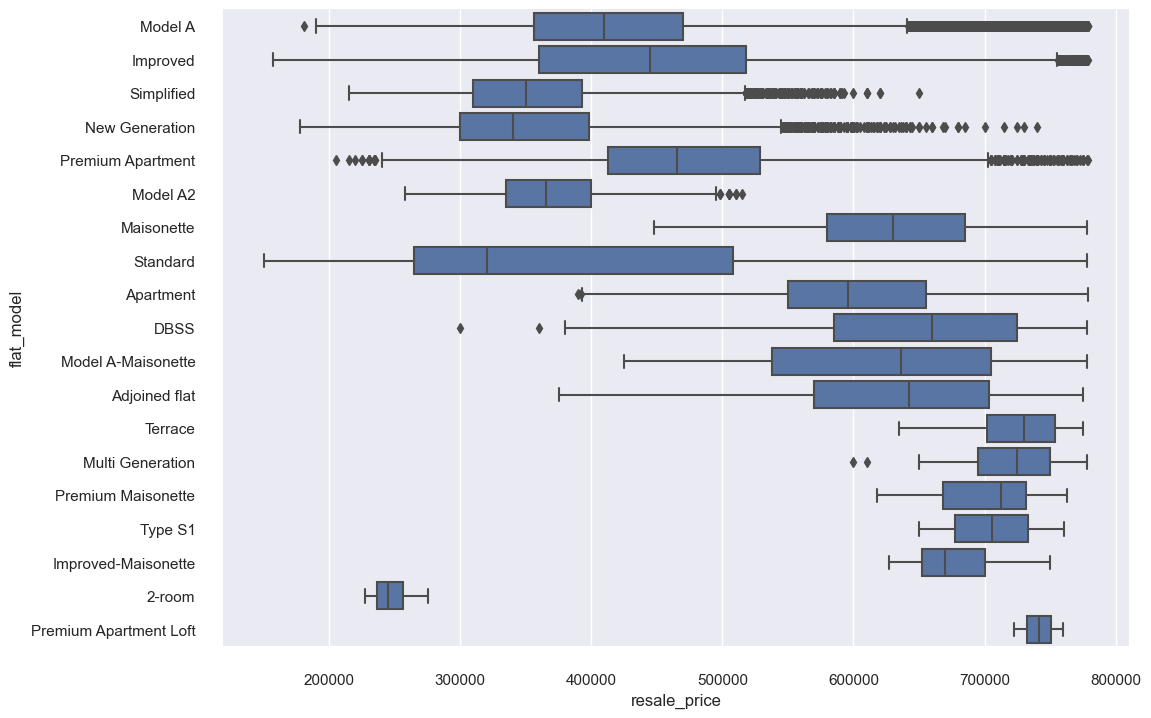

In [69]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.boxplot(y="flat_model", x="resale_price",
            palette=["b"],
            data=housing)

sns.despine(offset=10, trim=True)


In [70]:
housing.groupby('full_flat_type')['resale_price'].mean().sort_values(ascending = False)

full_flat_type
5 ROOM Premium Apartment Loft        741400.000000
3 ROOM Terrace                       724133.942857
MULTI-GENERATION Multi Generation    716993.212121
4 ROOM Type S1                       705444.000000
5 ROOM DBSS                          705284.103226
EXECUTIVE Premium Maisonette         702200.000000
EXECUTIVE Adjoined flat              682222.666667
5 ROOM Improved-Maisonette           677573.052632
4 ROOM DBSS                          657010.230435
EXECUTIVE Maisonette                 633164.404659
5 ROOM Model A-Maisonette            625549.804757
5 ROOM Adjoined flat                 619948.990826
EXECUTIVE Apartment                  602387.405456
4 ROOM Adjoined flat                 580239.960000
5 ROOM Standard                      575177.478693
EXECUTIVE Premium Apartment          558811.900209
5 ROOM Model A                       533845.463536
3 ROOM DBSS                          505980.813559
5 ROOM Improved                      502675.789649
5 ROOM Premium A

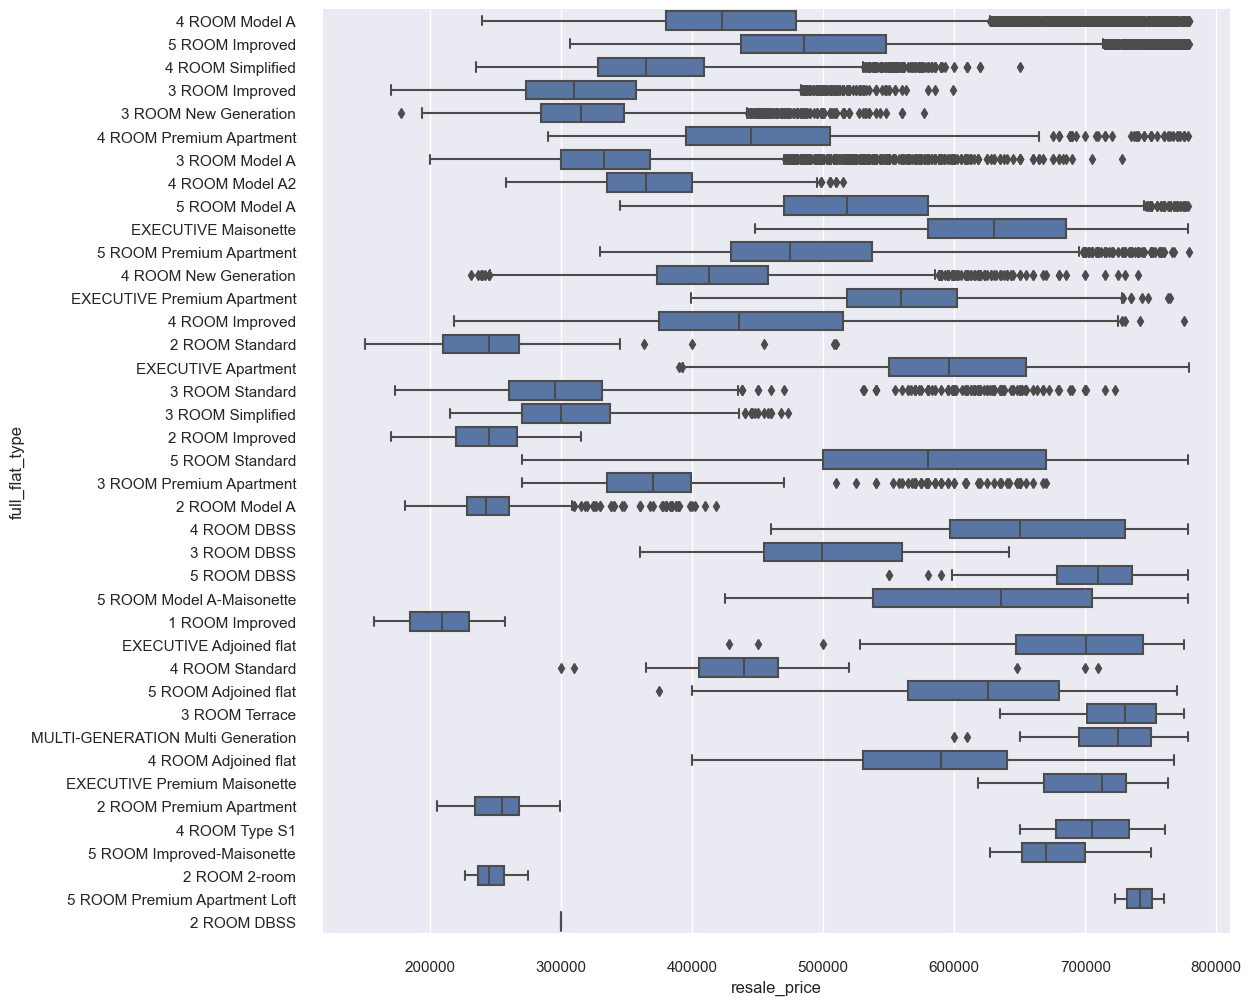

In [71]:
sns.set(rc={'figure.figsize':(11.7,12)})

sns.boxplot(y="full_flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


In [72]:
housing.groupby('flat_type')['resale_price'].mean().sort_values(ascending = False)

flat_type
MULTI-GENERATION    716993.212121
EXECUTIVE           607380.230422
5 ROOM              508282.000420
4 ROOM              437516.519482
3 ROOM              325612.748722
2 ROOM              245532.248543
1 ROOM              207015.463415
Name: resale_price, dtype: float64

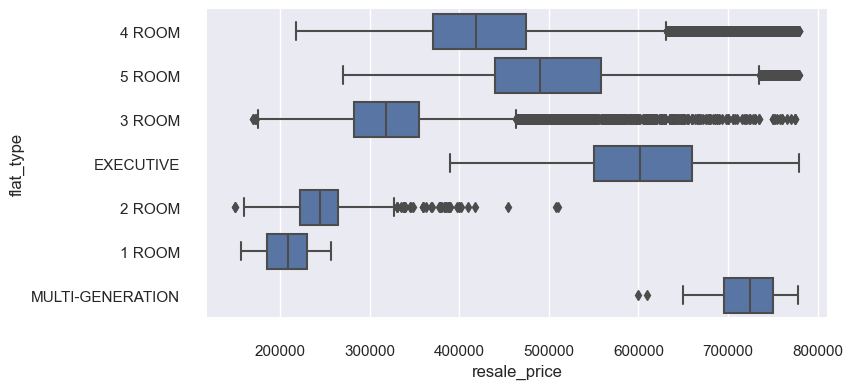

In [73]:
sns.set(rc={'figure.figsize':(8,4)})

sns.boxplot(y="flat_type", x="resale_price",
            palette=["b"],
            data=housing)
sns.despine(offset=10, trim=True)


We will drop full_flat_type due to its high granularity as a categorical variable (which would create a large number of dummy variables). To use flat_model and flat_type instead 

In [74]:
# Dropping full flat type

housing.drop(columns = ['full_flat_type'], inplace = True)

#### b) Location and address

In [75]:
# Looking at all the categorical location-type columns... 

housing[['town', 'street_name', 'block', 'address', 'planning_area', 'mrt_name', 'bus_stop_name']].head()

,town,street_name,block,address,planning_area,mrt_name,bus_stop_name
0,KALLANG/WHAMPOA,UPP BOON KENG RD,3B,"3B, UPP BOON KENG RD",Kallang,Kallang,Blk 3B
1,BISHAN,BISHAN ST 13,153,"153, BISHAN ST 13",Bishan,Bishan,BLK 151A MKT
3,BISHAN,BISHAN ST 22,232,"232, BISHAN ST 22",Bishan,Bishan,Opp Bishan Nth Shop Mall
4,YISHUN,YISHUN ST 81,876,"876, YISHUN ST 81",Yishun,Khatib,Blk 873
5,GEYLANG,ALJUNIED CRES,95,"95, ALJUNIED CRES",Geylang,MacPherson,Blk 90


In [76]:
# Calculating the average resale price by mrt station

mrt_mean_price = housing.groupby('mrt_name')['resale_price'].mean().sort_values(ascending = False)

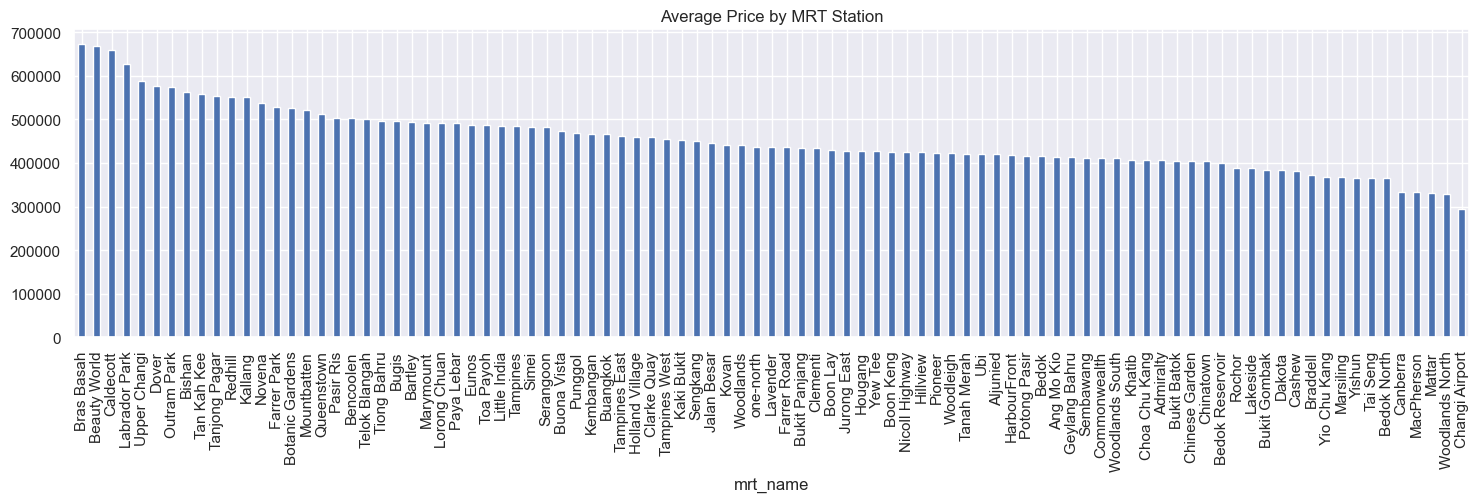

In [77]:
# Visualising the mean resale price by mrt station

mrt_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by MRT Station')
plt.show()

There are over 1.6k possible values in bus_stop_name. Creates too many dimensions with limited info (alot of 0s and a single 1 per column) We will drop this from the model. 

In [78]:
bus_stop_resale = housing.groupby('bus_stop_name')['resale_price'].mean().sort_values(ascending = False)
bus_stop_resale.head()

bus_stop_name
Blk 101C CP              768000.0
Opp Blk 116              757500.0
Pei Hwa Presby Pr Sch    755000.0
Eunos Stn/ Int           751000.0
Aft Anglo-Chinese JC     749200.0
Name: resale_price, dtype: float64

In [79]:
# Drop town, street name, address, mrt_name, to use 'planning_area' for location
# To also drop bus_stop_name due to granularity issues - too many small counts

housing.drop(columns = ['town', 'street_name', 'block', 'address', 'mrt_name','bus_stop_name'], inplace = True)

In [80]:
# Bus interchange on resale price

housing.groupby('bus_interchange')['resale_price'].mean()

bus_interchange
0    427360.190771
1    439086.421758
Name: resale_price, dtype: float64

The presence of a bus interchange doesn't seem to affect resale price much, probably because people just need a nearby bus stop to access a range of possible buses to their destination rather than an interchange. Will drop this variable.

In [81]:
housing.drop(columns = 'bus_interchange', inplace = True)

#### c) Amenities

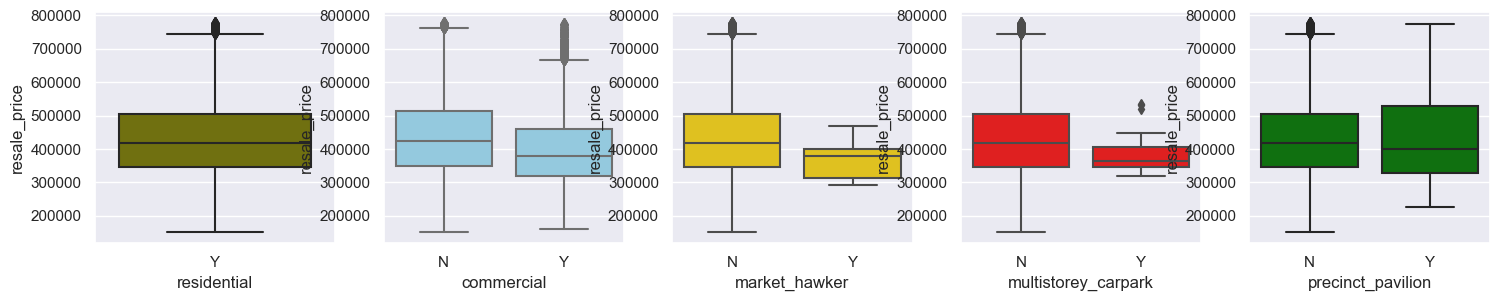

In [82]:
# Looking at amenity-related variables by relationship to resale price

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.boxplot(data=df, x="residential", y = "resale_price", color="olive", ax=axs[0])
sns.boxplot(data=df, x="commercial", y = "resale_price", color="skyblue", ax=axs[1])
sns.boxplot(data=df, x="market_hawker", y = "resale_price", color="gold", ax=axs[2])
sns.boxplot(data=df, x="multistorey_carpark", y = "resale_price", color="red", ax=axs[3])
sns.boxplot(data=df, x="precinct_pavilion", y = "resale_price", color="green", ax=axs[4])

plt.show()

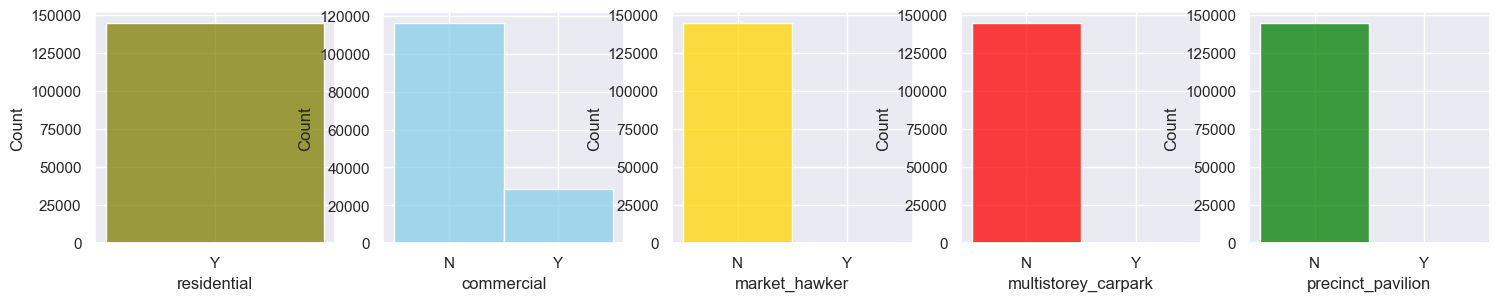

In [83]:
# Looking at amenity-related variables by count

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
df = housing

sns.histplot(data=df, x="residential",  color="olive", ax=axs[0])
sns.histplot(data=df, x="commercial",  color="skyblue", ax=axs[1])
sns.histplot(data=df, x="market_hawker",  color="gold", ax=axs[2])
sns.histplot(data=df, x="multistorey_carpark",  color="red", ax=axs[3])
sns.histplot(data=df, x="precinct_pavilion", color="green", ax=axs[4])

plt.show()

In [84]:
housing.residential.value_counts(normalize = True)

Y    1.0
Name: residential, dtype: float64

In [85]:
housing.commercial.value_counts(normalize = True)

N    0.804293
Y    0.195707
Name: commercial, dtype: float64

In [86]:
housing.market_hawker.value_counts(normalize = True)

N    0.999896
Y    0.000104
Name: market_hawker, dtype: float64

In [87]:
housing.multistorey_carpark.value_counts(normalize = True)

N    0.99971
Y    0.00029
Name: multistorey_carpark, dtype: float64

In [88]:
housing.precinct_pavilion.value_counts(normalize = True)

N    0.999233
Y    0.000767
Name: precinct_pavilion, dtype: float64

In [89]:
# Keeping only commercial and dropping the rest due to sparsity of data. 

housing.drop(columns = ['residential','market_hawker','multistorey_carpark', 
                        'precinct_pavilion'], inplace = True)

#### d) Primary and Secondary School variables

In [90]:
# Calculating the average resale price by mrt station

pri_sch_name_mean_price = housing.groupby('pri_sch_name')['resale_price'].mean().sort_values(ascending = False)

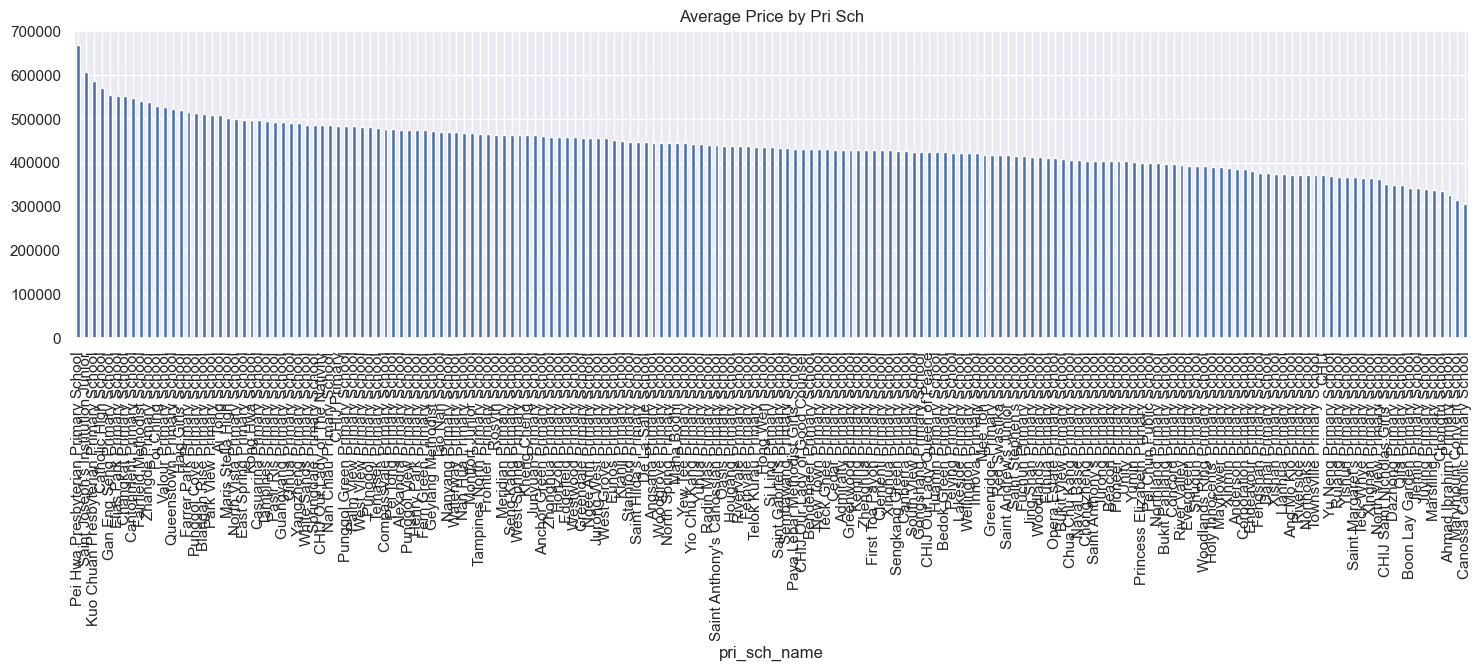

In [91]:
# Visualising the mean resale price by mrt station

pri_sch_name_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by Pri Sch')
plt.show()

In [92]:
# Calculating the average resale price by mrt station

sec_sch_name_mean_price = housing.groupby('sec_sch_name')['resale_price'].mean().sort_values(ascending = False)

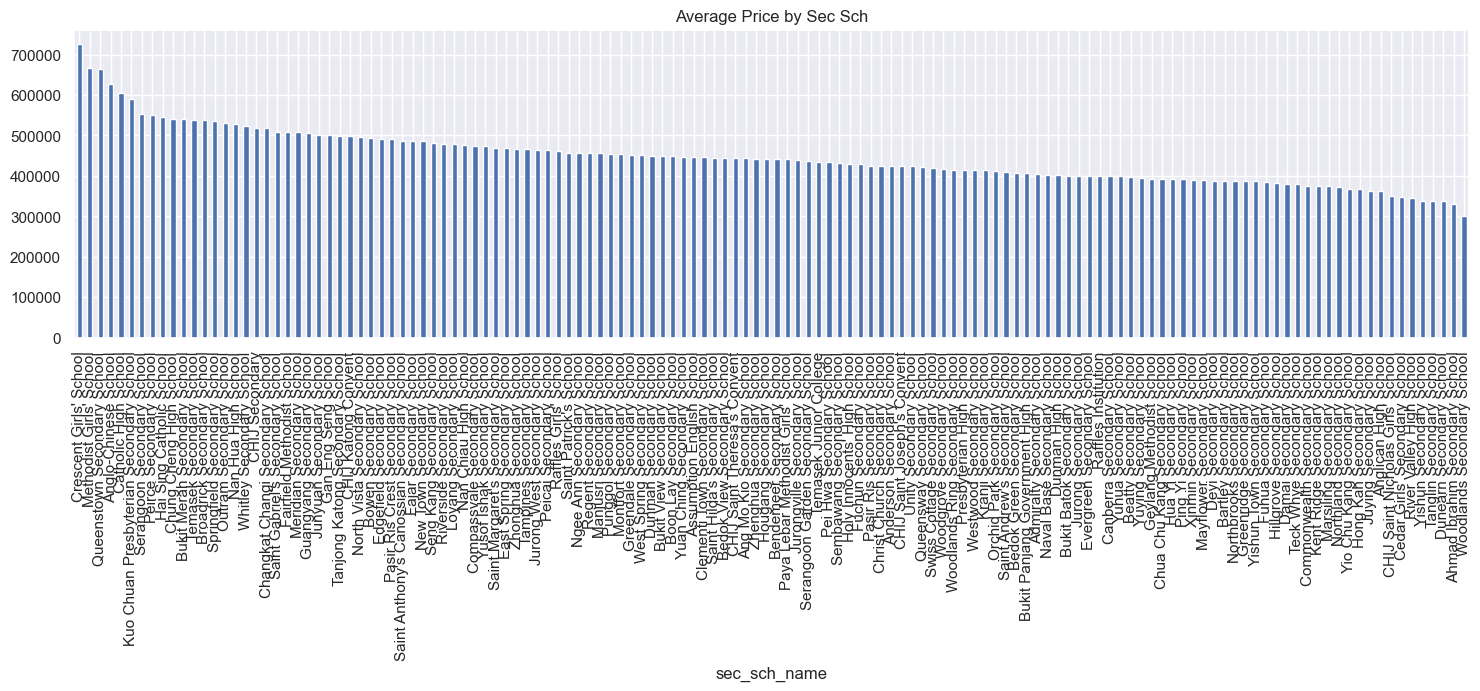

In [93]:
# Visualising the mean resale price by mrt station

sec_sch_name_mean_price.plot.bar(figsize=(18,4)).set(title='Average Price by Sec Sch')
plt.show()

While schools names seem to have an effect on resale price, we'll drop them to prevent an increase in dimensionality that might cause model overfitting and increase complexity without explaining much of the dependent variable's variance.

In [94]:
housing.drop(columns = ['pri_sch_name','sec_sch_name'], inplace = True)

#### e) Transaction Year and Month

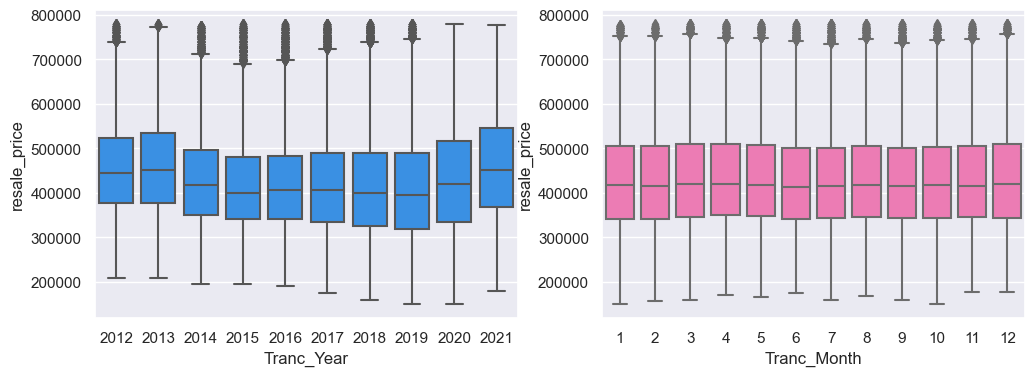

In [95]:
# Looking at the year and month distributions

sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(12,4))
df = housing

sns.boxplot(data=df, x="Tranc_Year", y = "resale_price", color="dodgerblue", ax=axs[0])
sns.boxplot(data=df, x="Tranc_Month", y = "resale_price", color="hotpink", ax=axs[1])

plt.show()

Looks like the year of transaction has some impact on resale price, while there are minimal differences by month. We will drop transaction month from consideration as a predictor.

In [96]:
# Dropping transaction month as it doesn't have much variation in relation to resale price

housing.drop(columns = ['Tranc_Month'], inplace = True)

### Looking at skew and multicollinearity

In [97]:
# Checking for skewness of variables

housing.skew().sort_values(ascending=False).round(2)

/var/folders/r9/9246nqp9249ghjl6r9xy_dwr0000gn/T/ipykernel_7907/3820577826.py:3: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.skew().sort_values(ascending=False).round(2)


resale_price                 0.64
1_2_3_rooms_sold             0.54
Tranc_Year                  -0.12
pri_sch_nearest_distance    -0.16
sec_sch_nearest_dist        -0.19
Hawker_Nearest_Distance     -0.24
floor_area_sqft             -0.35
est_floor_level             -0.41
hawker_market_stalls        -0.44
bus_stop_nearest_distance   -0.54
mrt_nearest_distance        -0.61
Hawker_Within_2km           -1.12
age_at_sale                 -1.13
Mall_Nearest_Distance       -1.60
distance_from_CBD           -2.47
4_5_other_rooms_sold        -3.18
Mall_Within_2km             -4.61
hawker_food_stalls          -8.56
dtype: float64

Data is not too skewed for most variables.

In [98]:
# Selecting numerical variables

housing.select_dtypes("number").columns

Index(['resale_price', 'floor_area_sqft', 'Mall_Nearest_Distance',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'distance_from_CBD', '1_2_3_rooms_sold',
       '4_5_other_rooms_sold', 'est_floor_level', 'age_at_sale'],
      dtype='object')

In [99]:
# Checking for multicollinearity between more than 2 variables using the VIF score

X = housing[['floor_area_sqft', 'Mall_Nearest_Distance',
       'Mall_Within_2km', 'Hawker_Nearest_Distance', 'Hawker_Within_2km',
       'hawker_food_stalls', 'hawker_market_stalls', 'mrt_nearest_distance',
       'bus_stop_nearest_distance', 'pri_sch_nearest_distance',
       'sec_sch_nearest_dist', 'distance_from_CBD', '1_2_3_rooms_sold',
       '4_5_other_rooms_sold', 'est_floor_level', 'age_at_sale']]
 

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                      feature         VIF
0             floor_area_sqft  602.164559
1       Mall_Nearest_Distance  117.596968
2             Mall_Within_2km    5.731700
3     Hawker_Nearest_Distance  134.405020
4           Hawker_Within_2km    2.763345
5          hawker_food_stalls   26.957664
6        hawker_market_stalls    1.426114
7        mrt_nearest_distance  124.892404
8   bus_stop_nearest_distance   78.763565
9    pri_sch_nearest_distance  113.751022
10       sec_sch_nearest_dist  106.631822
11          distance_from_CBD   11.764130
12           1_2_3_rooms_sold    1.960338
13       4_5_other_rooms_sold    8.238804
14            est_floor_level    8.637367
15                age_at_sale   33.881268


In [100]:
housing.describe(include = 'all')

,flat_type,flat_model,resale_price,Tranc_Year,floor_area_sqft,commercial,planning_area,Mall_Nearest_Distance,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,distance_from_CBD,1_2_3_rooms_sold,4_5_other_rooms_sold,est_floor_level,age_at_sale
count,144640,144640,144640.000000,144640.0,144640.000000,144640,144640,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000,144640.000000
unique,7,19,NaN,10.0,NaN,2,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4 ROOM,Model A,NaN,2020.0,NaN,N,Jurong West,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59659,45169,NaN,17852.0,NaN,116333,11444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,433821.778590,NaN,6.911920,NaN,NaN,6.333797,1.477422,6.657655,-0.009739,3.776260,0.925264,6.488306,4.621161,5.815913,6.053924,1.877586,-1.185171,3.808924,1.862782,3.023077
std,NaN,NaN,121070.637266,NaN,0.258973,NaN,NaN,0.622671,0.711952,0.976664,2.420895,0.749022,4.426066,0.595782,0.519926,0.572619,0.587359,0.652047,4.422126,1.887954,0.694355,0.660495
min,NaN,NaN,150000.000000,NaN,5.810194,NaN,NaN,-4.605170,-4.605170,0.627699,-4.605170,-4.605170,-4.605170,3.089742,2.197367,3.821405,3.661341,-10.297944,-4.605170,-4.605170,0.693147,0.000000
25%,NaN,NaN,345000.000000,NaN,6.680272,NaN,NaN,5.969919,1.098612,5.942073,0.000000,3.688879,-4.605170,6.140564,4.316886,5.421799,5.662170,1.495130,-4.605170,3.784190,1.609438,2.708050
50%,NaN,NaN,417000.000000,NaN,6.919502,NaN,NaN,6.404611,1.609438,6.689721,0.693147,3.761200,3.871201,6.539166,4.678117,5.849531,6.097001,1.993326,-4.605170,4.454347,2.079442,3.218876
75%,NaN,NaN,505000.000000,NaN,7.085737,NaN,NaN,6.767134,1.791759,7.449254,1.791759,4.094345,4.595120,6.891431,4.985356,6.215306,6.457064,2.368962,4.189655,4.700480,2.397895,3.496508


In [101]:
# final dataset for modelling 

housing.shape

(144640, 22)

### Exporting data

In [102]:
# Save as csv file 
housing.to_csv('./housing2.csv')  